In [1]:
from PIL import Image
import matplotlib.pyplot as plt

#### Định nghĩa vấn đề – Pima Indians Diabetes Dataset

Bộ dữ liệu Pima Indians Diabetes là một tập dữ liệu y học gồm 768 mẫu (instances), mỗi mẫu là thông tin về một người phụ nữ có nguồn gốc từ bộ tộc Pima (ở bang Arizona, Hoa Kỳ), từ 21 tuổi trở lên.

Mỗi mẫu bao gồm 8 đặc trưng đầu vào (features) liên quan đến các chỉ số y sinh học và lối sống, cụ thể như sau:

+  1 Số lần mang thai (Pregnancies)

+ 2 Nồng độ glucose huyết tương sau 2 giờ trong nghiệm pháp dung nạp glucose (Glucose)

+ 3 Huyết áp tâm trương (Diastolic Blood Pressure)

+ 4 Độ dày nếp da ở cánh tay sau (Triceps Skin Fold Thickness)

+ 5 Nồng độ insulin huyết thanh sau 2 giờ (2-Hour Serum Insulin)

+ 6 Chỉ số khối cơ thể BMI (Body Mass Index)

+ 7 Hàm phả hệ tiểu đường (Diabetes Pedigree Function – ước lượng khả năng di truyền)

+ 8 Tuổi (Age)

Dữ liệu đầu vào của bài toán là một vector gồm 8 giá trị tương ứng với các đặc trưng trên.

Kết quả đầu ra (nhãn) là một giá trị nhị phân:

+ 0: người đó không mắc bệnh tiểu đường

+ 1: người đó có mắc bệnh tiểu đường (theo chuẩn đoán lâm sàng)

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [2]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

In [3]:
import os
import urllib.request

# Tạo thư mục nếu chưa có
os.makedirs("data", exist_ok=True)

# URL nguồn dữ liệu
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
output_path = "data/pima-indians-diabetes.csv"

# Tải về
urllib.request.urlretrieve(url, output_path)
print("Tải thành công file dữ liệu!")


Tải thành công file dữ liệu!


In [4]:
# Đường dẫn tới file dữ liệu Pima Indians Diabetes
data_path  = "data/pima-indians-diabetes.csv"  
data_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
              "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Load dữ liệu vào DataFrame
df_dataset = pd.read_csv(data_path, names=data_names)


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [5]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**

+ Dữ liệu có 8 tính chất để chuẩn đoán người đó mắc bệnh tiểu đường : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
+ 6 Đặc trưng có kiểu dữ liệu int 
+ 2 Đặc trưng BMI, DiabetesPedigreeFunction có kiểu dữ liệu float 
+ Tổng số dòng dữ liệu là 768 dòng
+ Dữ liệu để chuẩn đoán người đó có mắc bệnh ở cột outcome


#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [6]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
    s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
    display.display(df_dataset.query(s_query1))
    display.display(df_dataset.query(s_query2))
    display.display(df_dataset[df_dataset.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét**
+ Dữ liệu không có giá trị trùng lập
+ Dữ liệu không có giá trị rỗng(NaN,Null)

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [7]:
description = df_dataset.describe().T
display.display(description)

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

**Nhận xét**
+ Một số cột như Glucose, BloodPressure, SkinThickness, Insulin, BMI có giá trị min = 0, điều này không hợp lý về mặt y học → có thể là giá trị thiếu (missing values).

+ Trung bình:

  + BMI ~ 32 → người tham gia nghiên + cứu có xu hướng thừa cân / béo phì

  + Tuổi trung bình ~ 33

+ Tỉ lệ người mắc tiểu đường (Outcome = 1) là khoảng 34.9%

In [9]:
df_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Nhận xét**
+ 0: 500 người không bị tiểu đường

+ 1: 268 người bị tiểu đường

Tỉ lệ bị tiểu đường: 268 / 768 ≈ 34.9%

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

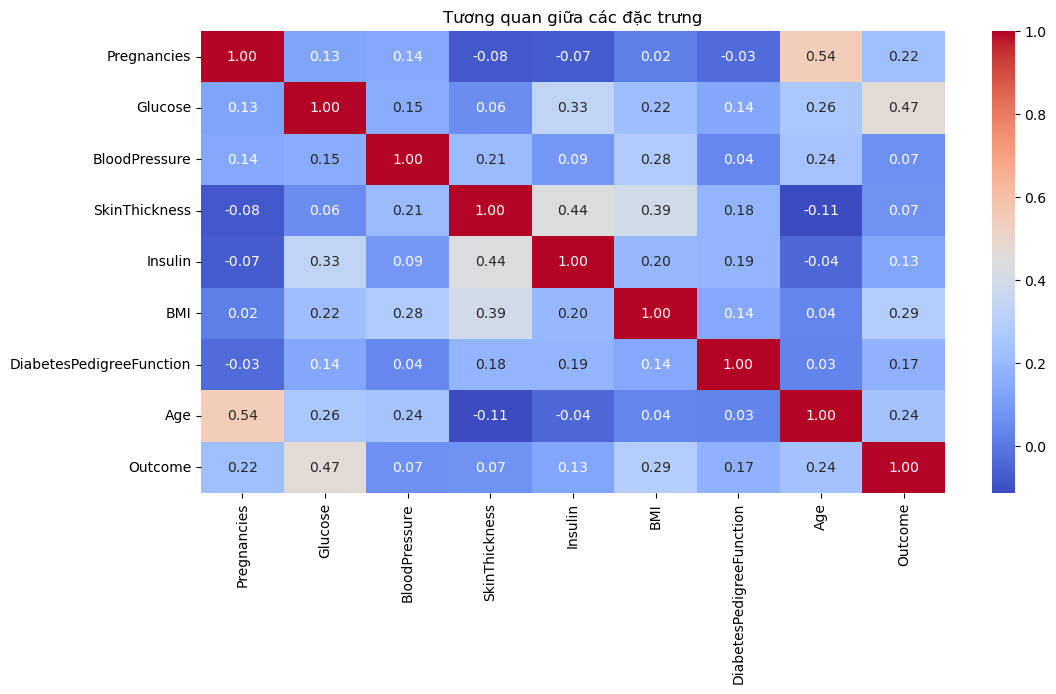

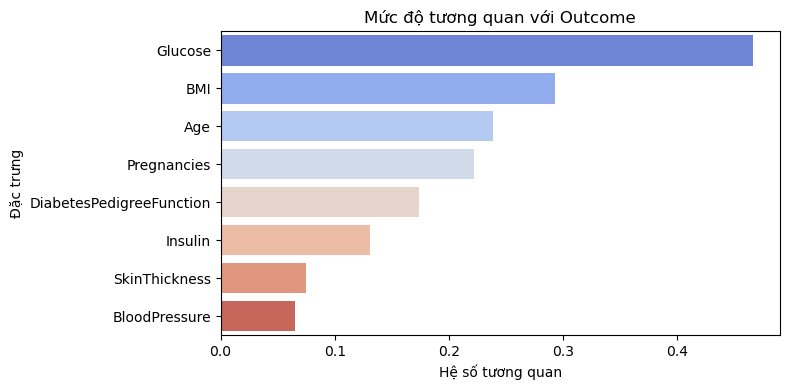

In [14]:
corr_matrix = df_dataset.corr(numeric_only=True)

# Biểu đồ tương quan đầy đủ
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Tương quan giữa các đặc trưng")
plt.show()

# Biểu đồ tương quan riêng với Outcome
plt.figure(figsize=(8, 4))
outcome_corr = corr_matrix["Outcome"].drop("Outcome").sort_values(ascending=False)
sns.barplot(x=outcome_corr.values, y=outcome_corr.index, palette="coolwarm")
plt.title("Mức độ tương quan với Outcome")
plt.xlabel("Hệ số tương quan")
plt.ylabel("Đặc trưng")
plt.tight_layout()
plt.show()

##### 1 Biểu đồ heatmap ma trận tương quan giữa tất cả các đặc trưng

##### 2 Biểu đồ cột thể hiện mức độ tương quan của từng đặc trưng với Outcome (mục tiêu: có bị tiểu đường hay không)

| Đặc trưng                    | Hệ số tương quan với Outcome | Nhận xét ngắn                        |
| ---------------------------- | ---------------------------- | ------------------------------------ |
| **Glucose**                  | ~ 0.47                       | Tương quan **mạnh nhất** với Outcome |
| **BMI**                      | ~ 0.31                       | Tương quan dương rõ rệt              |
| **Age**                      | ~ 0.24                       | Người lớn tuổi có khả năng cao hơn   |
| **DiabetesPedigreeFunction** | ~ 0.17                       | Tương quan nhẹ (do di truyền)        |
| **Pregnancies**              | ~ 0.22                       | Có xu hướng tăng nguy cơ             |
| **Insulin**                  | ~ 0.13                       | Tương quan nhẹ                       |
| **BloodPressure**            | ~ 0.06                       | Tương quan yếu                       |
| **SkinThickness**            | ~ 0.07                       | Gần như không tương quan             |
+ Glucose là yếu tố có tương quan mạnh nhất với nguy cơ tiểu đường. Điều này hợp lý vì đây là chỉ số đường huyết.
+ Các chỉ số khác như BMI, Tuổi, Thai kỳ, và Yếu tố di truyền cũng có liên hệ nhất định.
+ Ngược lại, BloodPressure và SkinThickness có tương quan rất thấp → có thể ít quan trọng trong mô hình dự đoán.

Từ heatmap đầy đủ, có thể quan sát:

+ Glucose ↔ Insulin: có thể tương quan nhẹ → người có đường huyết cao cũng có insulin cao (dù giá trị Insulin chứa nhiều số 0 bất thường).

+ Pregnancies ↔ Age: tương quan dương nhẹ → tuổi càng cao càng có nhiều lần mang thai.

+ Các đặc trưng còn lại hầu hết không có tương quan cao giữa nhau → mô hình không bị ảnh hưởng bởi đa cộng tuyến mạnh.

**Kết luận**
+ Các đặc trưng Glucose, BMI, Age, Pregnancies, và DiabetesPedigreeFunction có ảnh hưởng rõ ràng đến nguy cơ tiểu đường.

+ Có thể loại bỏ / giảm trọng số cho các đặc trưng có tương quan thấp như: SkinThickness và BloodPressure, nếu muốn đơn giản mô hình.

+ Cần xử lý các giá trị bất thường (0 ở Glucose, BMI, Insulin...) trước khi huấn luyện mô hình để đảm bảo kết quả chính xác.

In [13]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

| Đặc trưng                    | Tương quan với `Outcome` | Nhận xét ngắn gọn                      |
| ---------------------------- | ------------------------ | -------------------------------------- |
| **Glucose**                  | ~ **0.47**               | Tương quan dương mạnh nhất với Outcome |
| **BMI**                      | ~ 0.31                   | Có liên hệ tương đối mạnh              |
| **Age**                      | ~ 0.24                   | Tuổi càng cao, khả năng mắc tăng       |
| **Pregnancies**              | ~ 0.22                   | Có xu hướng dương nhẹ                  |
| **DiabetesPedigreeFunction** | ~ 0.17                   | Yếu tố di truyền ảnh hưởng             |
| **Insulin**                  | ~ 0.13                   | Tương quan nhẹ (dữ liệu nhiều số 0)    |
| **SkinThickness**            | ~ 0.07                   | Gần như không tương quan               |
| **BloodPressure**            | ~ 0.06                   | Rất yếu                                |


**Nhận xét** 
1.  Đặc trưng có ảnh hưởng đến tiểu đường (Outcome)

+ Glucose là chỉ số quan trọng nhất — phù hợp với thực tế y học: đường huyết cao là tiêu chí chẩn đoán tiểu đường.

+ BMI (chỉ số béo phì) và Tuổi cũng liên quan: người béo và lớn tuổi có nguy cơ cao hơn.

+ Pregnancies có thể liên quan đến tiểu đường thai kỳ – cũng là yếu tố đáng chú ý.

2.  Tương quan giữa các đặc trưng với nhau

+ Pregnancies ↔ Age: tương quan nhẹ dương (~ 0.54) → hợp lý: tuổi cao hơn thì có nhiều lần mang thai hơn.

+ Glucose ↔ Insulin: không cao như mong đợi vì dữ liệu Insulin có rất nhiều số 0 → làm nhiễu

+ Nhiều cặp biến có tương quan gần 0 → không có vấn đề đa cộng tuyến nghiêm trọng (mô hình dễ học hơn).

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

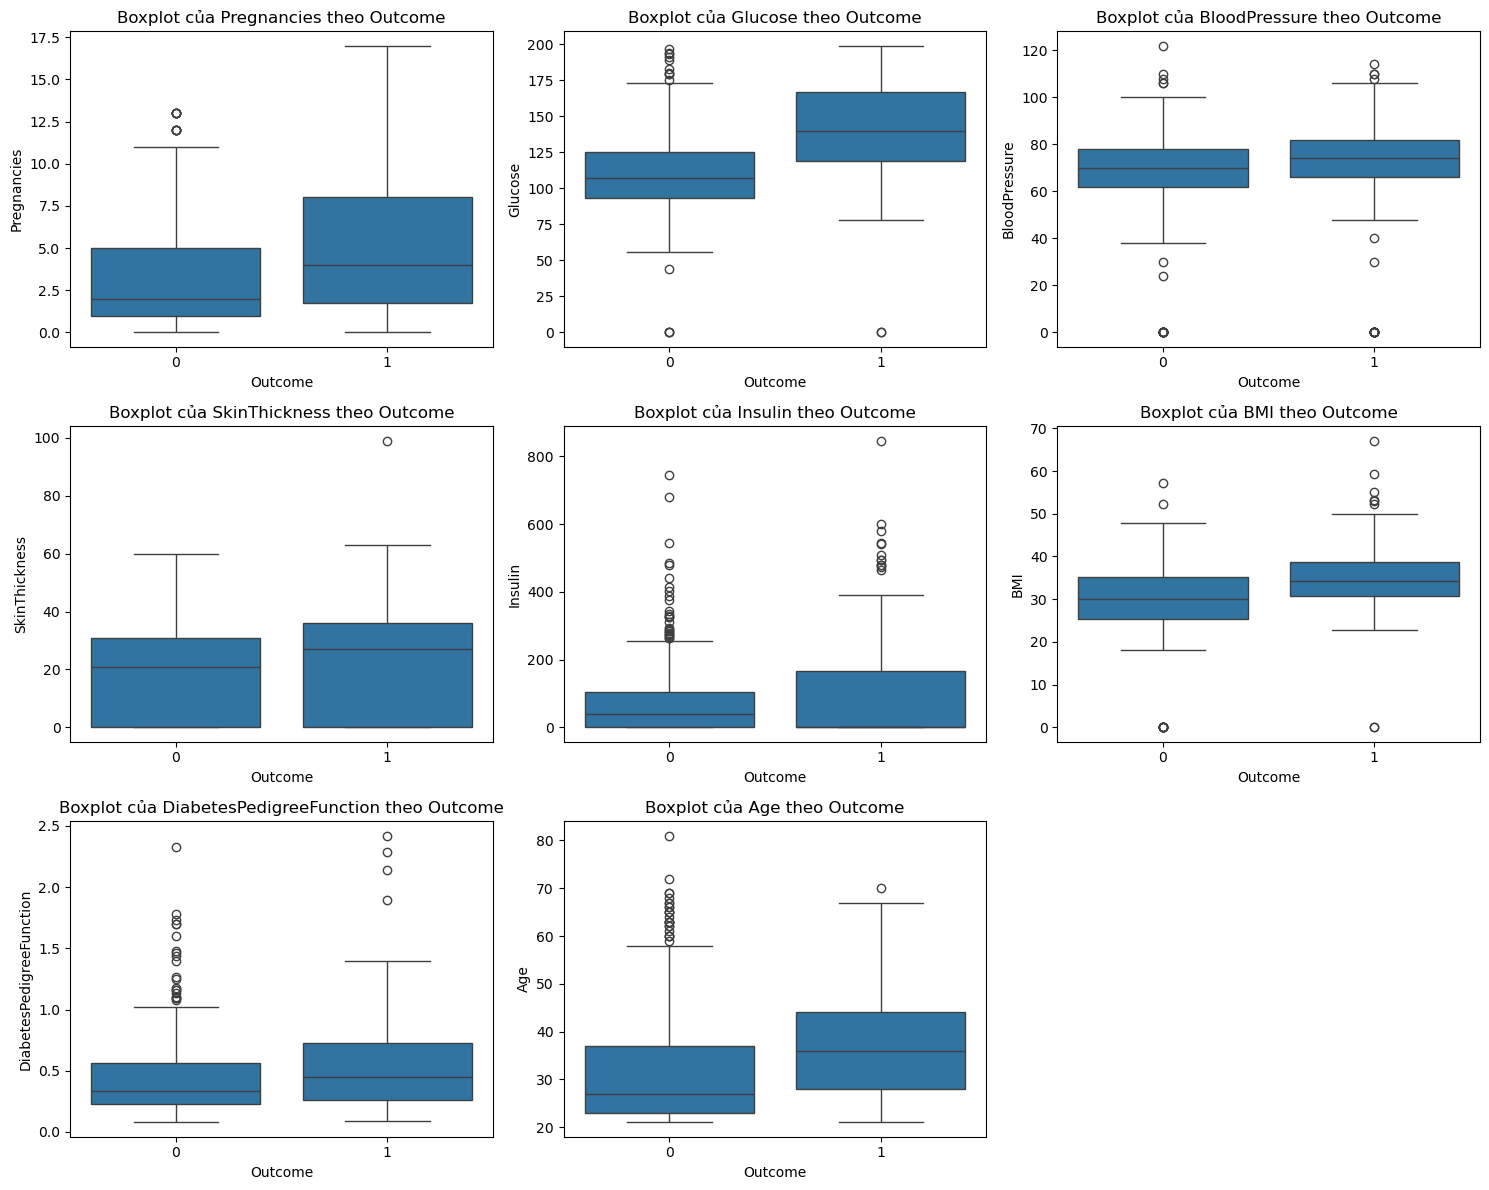

In [16]:
feature_cols = df_dataset.columns[:-1]

# Vẽ boxplot cho từng đặc trưng theo Outcome
plt.figure(figsize=(15, 12))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=col, data=df_dataset)
    plt.title(f"Boxplot của {col} theo Outcome")

plt.tight_layout()
plt.show()

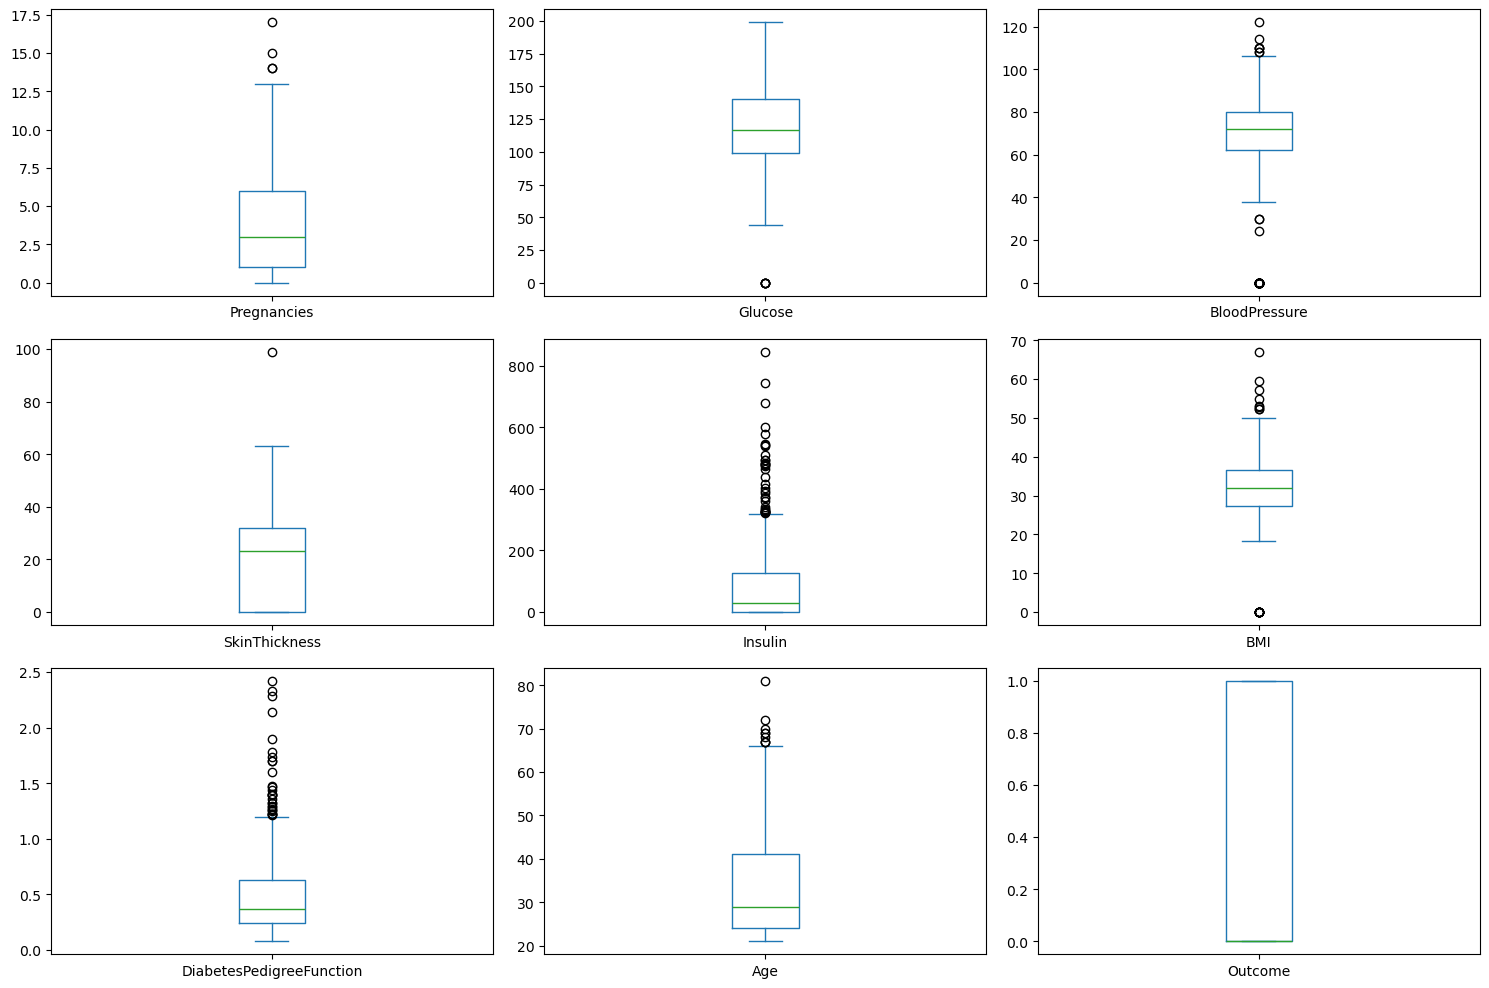

In [18]:
df_dataset.plot(kind="box", 
                subplots=True, 
                layout=(3, 3),   # 3 hàng 3 cột cho 9 biến
                sharex=False, 
                sharey=False, 
                figsize=(15, 10))
plt.tight_layout()
plt.show()


**Nhận xét đặc trưng qua 2 biểu đồ boxplot**
**41. Đặc trưng có phân bố rõ ràng, dễ phân biệt**

Glucose:

+ Giá trị trung vị và phân bố rất rộng, có nhiều điểm ngoại lai (outliers) rõ ràng.

+ Đây là đặc trưng rất quan trọng, dễ phân biệt người bệnh và không bệnh (đường huyết tăng cao ở người bệnh).

BMI:

+ Phân bố giá trị đa dạng, nhiều ngoại lai.

+ Liên quan đến nguy cơ tiểu đường do béo phì.

Age:

+ Phân bố trải dài, đặc biệt có xu hướng tăng dần theo độ tuổi.

+ Giúp phân biệt rủi ro theo nhóm tuổi.

**2. Đặc trưng có phân bố hẹp hoặc nhiều giá trị 0**

Insulin, BloodPressure, SkinThickness:

+ Rất nhiều giá trị thấp (có thể 0) khiến biểu đồ bị lệch hoặc có nhiều điểm outlier không tự nhiên.

+ Cần xử lý kỹ dữ liệu trước khi dùng.

Pregnancies:

+ Phân bố lệch, nhiều người có số lần mang thai thấp, nhưng một số có giá trị cao.

+ Có thể giúp phân biệt tiểu đường thai kỳ.

**3. Đặc trưng có ít sự khác biệt rõ rệt trên boxplot gộp**

+ Khi vẽ gộp tất cả boxplot trên cùng 1 biểu đồ, bạn dễ dàng thấy Glucose, Insulin có phạm vi lớn hơn hẳn các đặc trưng khác, trong khi Pregnancies hay Outcome có phạm vi nhỏ hơn nhiều.

Kết luận đặc trưng dựa trên 2 biểu đồ boxplot:

+ Glucose, BMI, Age là các đặc trưng nổi bật nhất, có phân bố rõ ràng, phù hợp để giữ lại.

+ Pregnancies cũng có giá trị nhưng phân bố không đều, cần xem xét thêm.

+ Insulin, BloodPressure, SkinThickness cần chú ý xử lý vì nhiều giá trị 0, có thể gây nhiễu.

+ Boxplot gộp giúp bạn tổng quan phạm vi giá trị của các đặc trưng để cân nhắc chuẩn hóa hoặc xử lý dữ liệu.

**Biểu đồ Histogram**

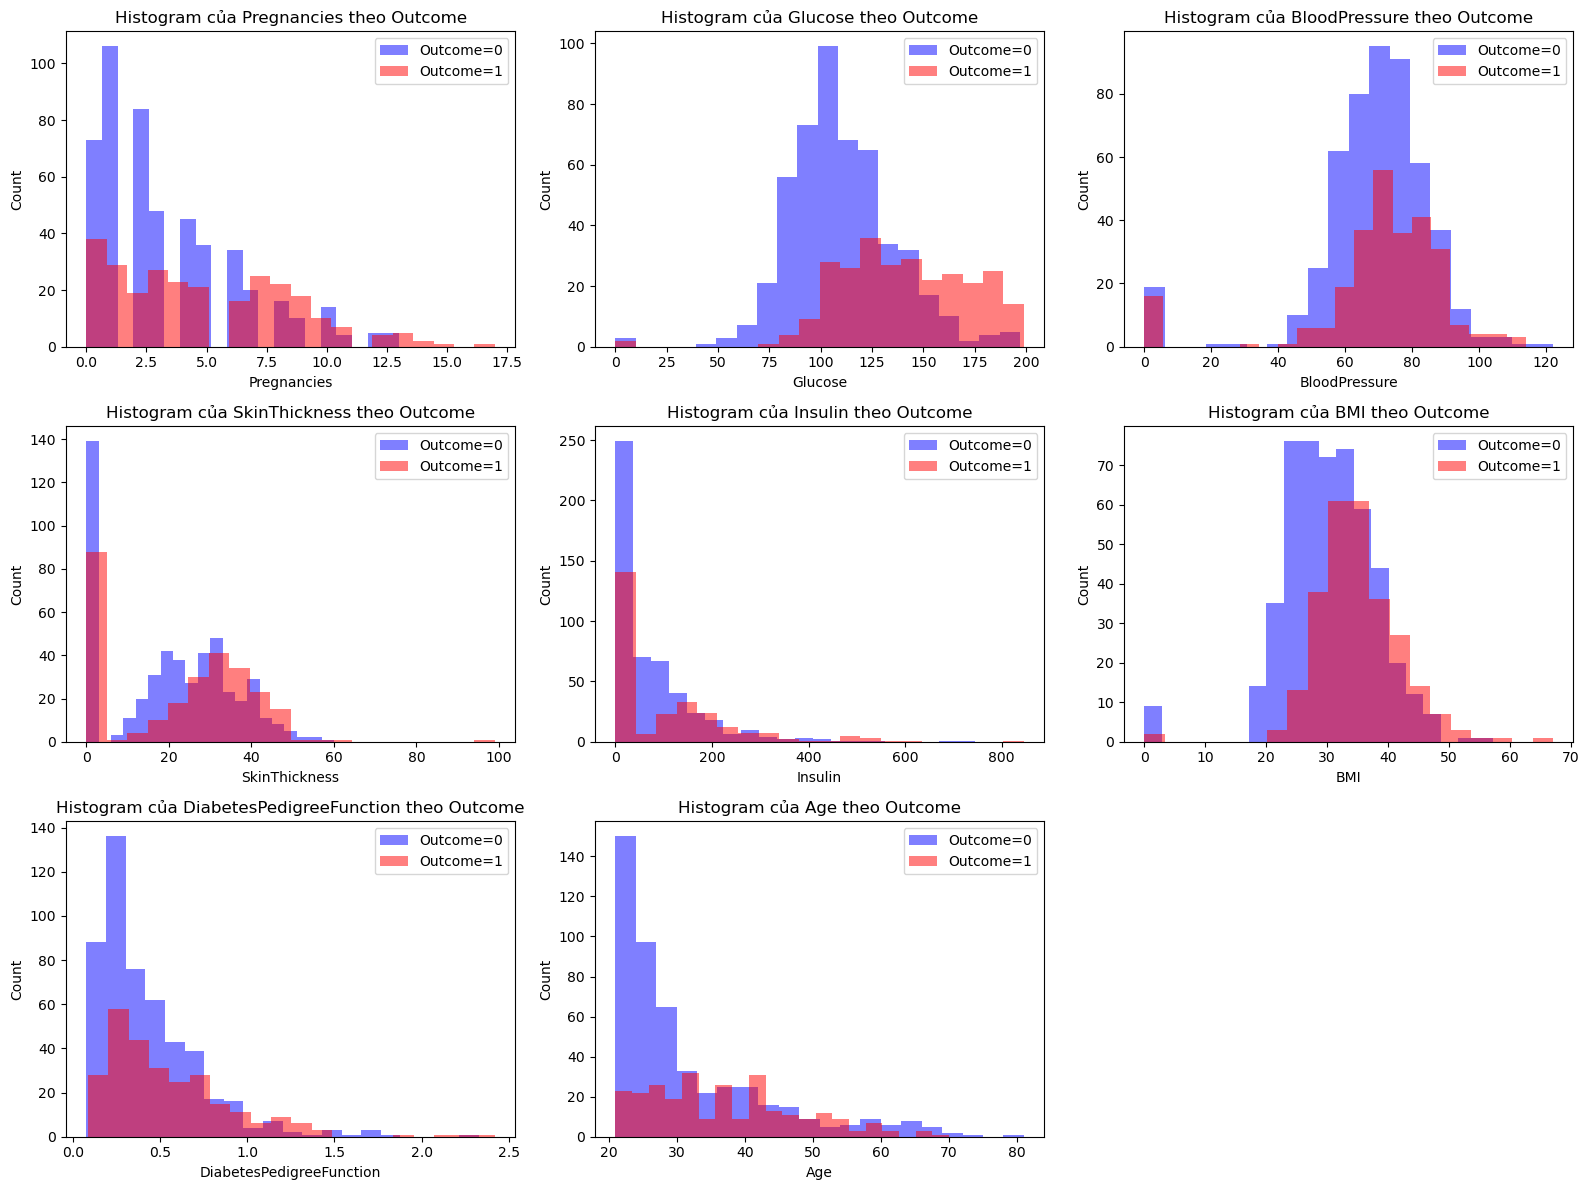

In [20]:
features = df_dataset.columns[:-1]

plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # 3 hàng 3 cột, đủ chỗ cho 8 biến
    # Vẽ histogram 2 nhóm phân theo Outcome
    for outcome_value, color in zip([0, 1], ['blue', 'red']):
        subset = df_dataset[df_dataset['Outcome'] == outcome_value]
        plt.hist(subset[feature], bins=20, alpha=0.5, label=f'Outcome={outcome_value}', color=color)
    
    plt.title(f'Histogram của {feature} theo Outcome')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

**Nhận xét về histogram phân theo Outcome**
**1. Glucose**

+ Phân bố của nhóm Outcome=1 (có tiểu đường) dịch về phía giá trị cao hơn nhiều so với nhóm Outcome=0.

+ Điều này cho thấy glucose cao là dấu hiệu quan trọng liên quan đến bệnh tiểu đường.

**2. BMI (Chỉ số khối cơ thể)**

+ Nhóm có tiểu đường (Outcome=1) có xu hướng có BMI cao hơn nhóm không bệnh.

+ BMI cao đồng nghĩa với nguy cơ béo phì, liên quan chặt đến tiểu đường.

**3. Age (Tuổi)**

+ Người bệnh tiểu đường thường có xu hướng lớn tuổi hơn nhóm không bệnh, thể hiện rõ qua phân bố lệch sang bên phải.

**4. Pregnancies (Số lần mang thai)**

+ Người có tiểu đường có xu hướng có nhiều lần mang thai hơn, nhưng phân bố khá rộng, ít phân biệt rõ ràng hơn so với các biến khác.

**5. DiabetesPedigreeFunction**

+ Biến này có phân bố khá tương đồng giữa hai nhóm, tuy nhiên nhóm tiểu đường có phần dày hơn ở các giá trị cao, cho thấy yếu tố di truyền có ảnh hưởng.

**6. Insulin**

+ Phân bố insulin khá lộn xộn và không phân biệt rõ giữa 2 nhóm, có thể do nhiều giá trị thiếu hoặc nhiễu trong dữ liệu.

**7. BloodPressure**

+ Phân bố áp suất máu gần như trùng nhau giữa hai nhóm, cho thấy biến này không phân biệt rõ nhóm tiểu đường và không tiểu đường.

**8. SkinThickness**

+ Phân bố cũng khá tương tự nhau, không phân biệt rõ ràng 2 nhóm.

**Tổng quan:**

+ Các biến quan trọng và có khả năng phân biệt tốt:
  + Glucose, BMI, Age — phân bố khác biệt rõ ràng giữa nhóm bệnh và không bệnh.

+ Biến ít phân biệt:
  + BloodPressure, SkinThickness, Insulin — phân bố tương đồng, cần xử lý kỹ hoặc có thể loại bỏ.

+ Biến có ảnh hưởng vừa phải:
  + Pregnancies, DiabetesPedigreeFunction — phân bố có sự khác biệt nhẹ.

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

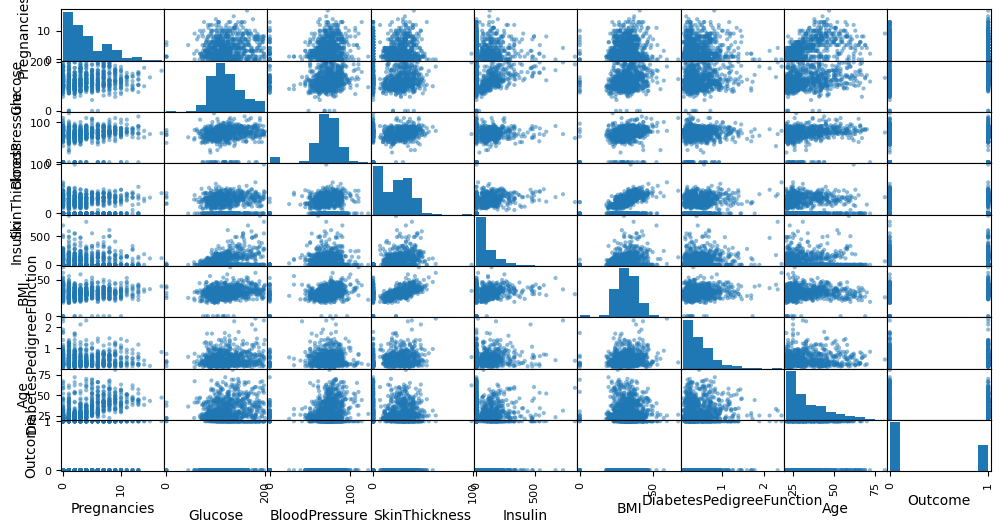

In [21]:
pd.plotting.scatter_matrix(df_dataset, figsize=(12,6));

**Nhận xét về kết quả scatter matrix**
**1. Ý nghĩa scatter matrix**

+ Scatter matrix (ma trận biểu đồ phân tán) cho phép bạn quan sát mối quan hệ 2 chiều giữa tất cả các cặp đặc trưng.

+ Các biểu đồ trên đường chéo thường là histogram của từng biến.

+ Giúp phát hiện xu hướng, tương quan tuyến tính, nhóm phân cụm, và các giá trị ngoại lai.

**2. Những gì quan sát:**

+ Tương quan giữa Glucose và Outcome:
Biểu đồ phân tán giữa Glucose với các biến khác sẽ thể hiện rõ sự phân tách nhóm bệnh (Outcome=1) và không bệnh (Outcome=0).

+ Các biến như BMI, Age, Pregnancies cũng sẽ cho thấy sự phân tách nhẹ hoặc rõ ràng hơn giữa các nhóm.

+ Một số biến như Insulin, BloodPressure, SkinThickness có thể không phân biệt nhóm rõ ràng trong scatter plots, thể hiện sự mờ nhạt trong mối quan hệ với Outcome.

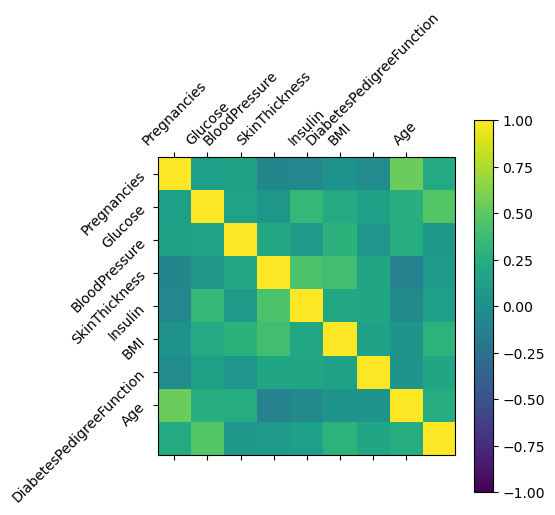

In [28]:
plt.matshow(correlations,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,8), rotation = 45);
plt.yticks(np.arange(0,8), rotation = 45);
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]));
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]));

**Nhận xét về kết quả ma trận tương quan**

**1 Ý nghĩa ma trận tương quan**
+ Ma trận này thể hiện mức độ liên hệ tuyến tính giữa các cặp biến trong bộ dữ liệu Pima Indians Diabetes, với giá trị nằm trong khoảng từ -1 đến 1:

  + +1: tương quan thuận hoàn hảo

  + 0: không có tương quan

  + -1: tương quan nghịch hoàn hảo

**2 Quan sát chính:**

+ Glucose:
  + Có tương quan dương mạnh nhất với biến Outcome (~0.47). Điều này cho thấy chỉ số glucose trong máu có ảnh hưởng rất rõ đến khả năng mắc tiểu đường.

+ BMI (Body Mass Index):
  + Tương quan vừa phải (~0.31) với Outcome. Người có BMI cao có nguy cơ mắc tiểu đường lớn hơn.

+ Age:
  + Có tương quan dương yếu đến trung bình (~0.24) với Outcome. Người lớn tuổi có xu hướng dễ mắc bệnh hơn.

+ Pregnancies và DiabetesPedigreeFunction:
  + Tương quan nhẹ (~0.22 và ~0.17) với Outcome, cho thấy ảnh hưởng vừa phải.

+ BloodPressure, SkinThickness, và Insulin:
  + Tương quan rất thấp hoặc gần bằng 0 với Outcome, nghĩa là các biến này không thể hiện mối liên hệ tuyến tính rõ ràng với tiểu đường trong bộ dữ liệu này.

**3 Tương quan giữa các biến đầu vào:**
Một số biến có tương quan lẫn nhau như:

+ SkinThickness và BMI có thể có tương quan nhẹ (vì liên quan đến cân nặng và mỡ cơ thể).

+ BloodPressure và Age có thể cũng tương quan nhẹ.

**4 Màu sắc trên heatmap:**

+ Các ô gần màu đỏ (gần 1) là các cặp biến có tương quan thuận cao.

+ Các ô gần màu xanh dương (gần -1) là tương quan nghịch.

+ Ô màu trắng hoặc trung tính thể hiện tương quan yếu hoặc không đáng kể.

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [29]:
df_clean = df_dataset.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [30]:
display.display(df_dataset[df_dataset.duplicated()])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [31]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [32]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [37]:
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["Outcome"])
class_names = class_encoder.classes_
print(class_names)

[0 1]


In [38]:
class_encoder.transform(df_clean["Outcome"])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [39]:
df_clean["Outcome"] = class_encoder.transform(df_clean["Outcome"])
df_clean

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [40]:
from sklearn.preprocessing import MinMaxScaler

scale_columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])  # df_clean là dataframe chứa dữ liệu Pima đã làm sạch

df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])

df_clean_minmax.head()  # Xem kết quả sau chuẩn hóa


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1

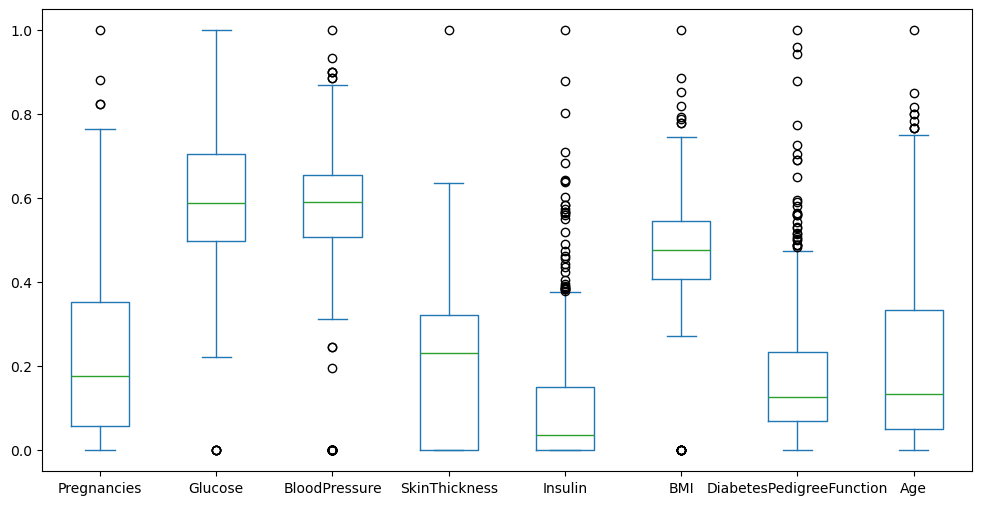

In [41]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [42]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.468492  1.425995        1  
1                   -0.365061 -0.190672        0  
2                    0.604397 -0.105584        1  
3                   -0.920763 -1.041549        0  
4                    5.484909 -0.020496        1  
..                        ...       ...      ...  
763                 -0.908682  2.532136        0  
764                 -0.398282 -0.531023        0  
765                 -0.685193 -0.275760        0  
766                 -0.371101  1.170732        1  
767                 -0.473785 -0.871374        0  

[768 rows x 9 columns]

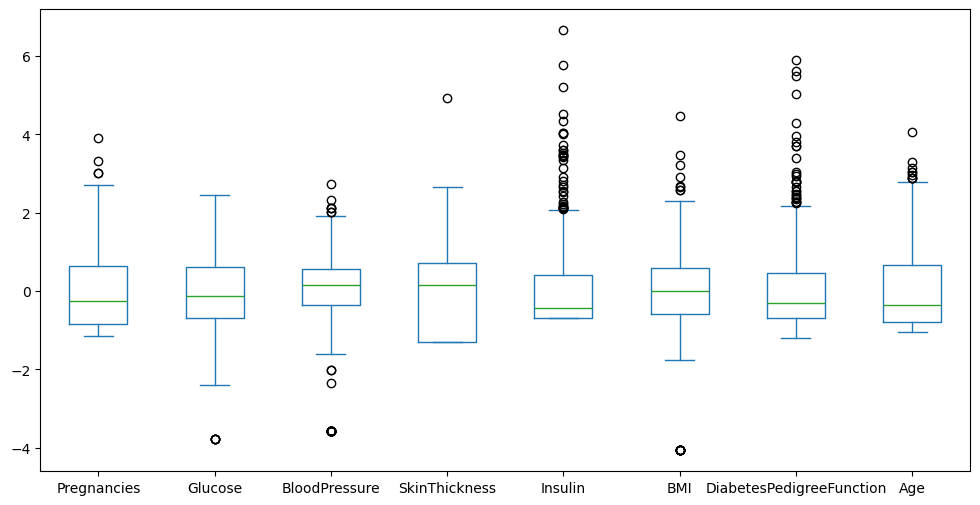

In [43]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [44]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [45]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.3

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[2.00e+00 9.80e+01 6.00e+01 1.70e+01 1.20e+02 3.47e+01 1.98e-01 2.20e+01]
 [2.00e+00 1.10e+02 7.40e+01 2.90e+01 1.25e+02 3.24e+01 6.98e-01 2.70e+01]
 [1.20e+01 1.40e+02 8.50e+01 3.30e+01 0.00e+00 3.74e+01 2.44e-01 4.10e+01]
 [1.00e+00 9.20e+01 6.20e+01 2.50e+01 4.10e+01 1.95e+01 4.82e-01 2.50e+01]
 [1.00e+00 1.73e+02 7.40e+01 0.00e+00 0.00e+00 3.68e+01 8.80e-02 3.80e+01]]
Output = [0. 0. 0. 0. 1.]
+ Test: shape=(231, 8)
Input = 
[[7.00e+00 1.14e+02 7.60e+01 1.70e+01 1.10e+02 2.38e+01 4.66e-01 3.10e+01]
 [6.00e+00 9.10e+01 0.00e+00 0.00e+00 0.00e+00 2.98e+01 5.01e-01 3.10e+01]
 [2.00e+00 8.10e+01 6.00e+01 2.20e+01 0.00e+00 2.77e+01 2.90e-01 2.50e+01]
 [3.00e+00 1.30e+02 6.40e+01 0.00e+00 0.00e+00 2.31e+01 3.14e-01 2.20e+01]
 [0.00e+00 1.39e+02 6.20e+01 1.70e+01 2.10e+02 2.21e+01 2.07e-01 2.10e+01]]
Output = [0. 0. 0. 0. 0.]


In [47]:
# Lưu thông tin
save_dir = "exps/iris"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)
# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

os.listdir(save_dir)

['class_encoder.joblib', 'data.npz', 'df_clean.xlsx']

In [48]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [49]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [50]:
joblib.load(f'{save_dir}/class_encoder.joblib').classes_

array([0, 1])

# Kết thúc